### Biblioteca

In [1]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np      

### Importando os dados 

In [2]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"
df = pd.read_csv(url)
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


### Explorando as caracteristicas 

In [3]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [4]:
## For visualization same features 
df_c = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']] 
df_c.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


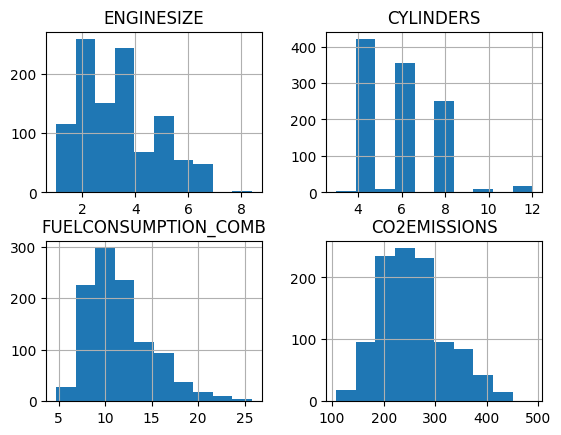

In [5]:
# Plot eache of these features:
df_c2 = df_c
df_c.hist()
plt.show()


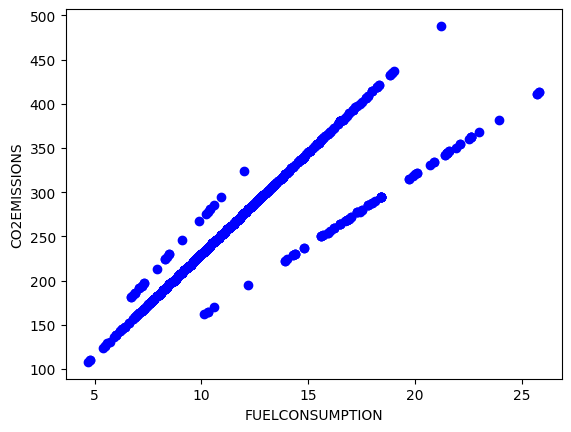

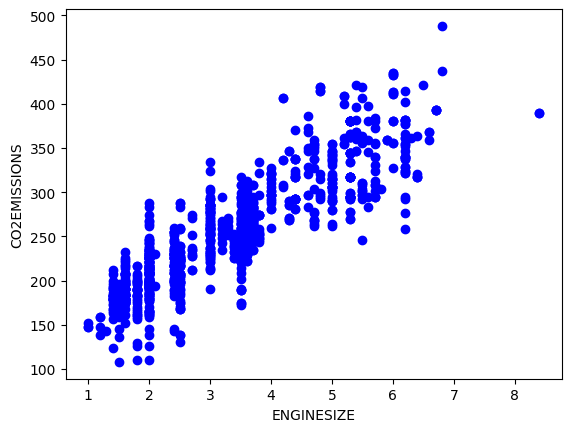

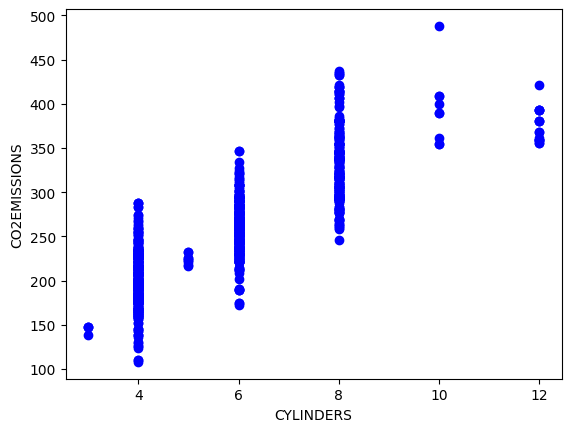

In [6]:
#now we  will see how these features behavior with function of CO2 emission
# For theses we need scatter plots 
plt.scatter(df_c.FUELCONSUMPTION_COMB,df_c.CO2EMISSIONS,color = "blue")
plt.xlabel("FUELCONSUMPTION")
plt.ylabel("CO2EMISSIONS")
plt.show() 
plt.scatter(df_c.ENGINESIZE,df_c.CO2EMISSIONS,color = "blue")
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")
plt.show() 
plt.scatter(df_c.CYLINDERS,df_c.CO2EMISSIONS,color = "blue")
plt.xlabel("CYLINDERS")
plt.ylabel("CO2EMISSIONS")
plt.show() 

### Create train and test dataset

In [7]:
# For random choice of de row in the data, we need create a list of 
# True or False (Boleanas) for selecting the rows
random_choice = np.random.rand(len(df)) <0.8
# Aqui ele cria uma lista de valores aleatorio  entre 0 e 1 
# Essa distribuição tem probabilidade igual para cada um dos termos
# depois foi adicionado "<0.8" assim ele me retorna  um lista de valore
# onde os numeros que não meno que 0.8 é dito True e maior é False
# Como a distribuição é uniforme 80% é verdadeira em uma sequencia aleatorio

# Agora com essa lista de Verdadeiro ou falso vamos jogar dentro da nossa data
# a linha que for falsa ele ira eliminar.
train = df_c[random_choice] # aqui so tem os True value isso significa que 
# escolheres 80% dos nosso dados de forma aleatoria.
# o resto vai para a parte do test
test =  df_c[random_choice]

 Plot da dados de treino

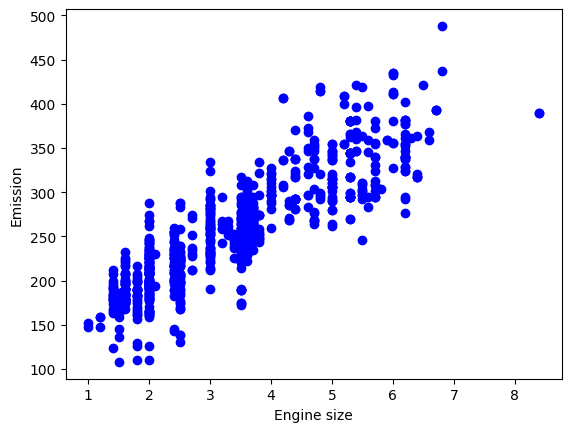

In [8]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

###  Create a linear regression model

Para criar um modelo linear vamos usar a biblioteca sckitlearn

In [9]:
from sklearn import linear_model

Precisamos instalar o pacote .

Google-> Scikitlearn install

https://scikit-learn.org/stable/install.html

!pip install -U scikit-learn

ou %pip install -U scikit-learn

In [10]:
%pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


Agora vai fucionar 

In [11]:
from sklearn import linear_model # IMPORTADO COM SUCESSO 
# PRIMEOR PASSO É CRIAR UM VARIAVEL DE REGRESSÃO 
reg =  linear_model.LinearRegression()

Vamos chamar as dados e jogar dentro do variavel/modelo de regressão 

Para ilustrar vamos usar o tamanho do motor 

In [12]:
x = train[['ENGINESIZE']]   # Variavel independente
y = train[['CO2EMISSIONS']] # Variavel dependent ou taget
reg.fit(x,y)                # FITANDO 

LinearRegression()

In [13]:
# forma alternativa
train[['ENGINESIZE']].head()
#np.asanyarray(train[['ENGINESIZE']])[0:5]

,ENGINESIZE
0,2.0
1,2.4
2,1.5
3,3.5
4,3.5


In [14]:
#y = a*x + b
print("a: ",reg.coef_)
print("b: ",reg.intercept_)

a:  [[38.91320213]]
b:  [125.39400908]


In [16]:
df.to_csv("FuelConsumption.csv")